In [10]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

In [11]:
sns.set_style('ticks')

In [12]:
plt.rcParams['svg.fonttype'] = 'none'

In [13]:
org_dir = path.join('../../data/interim/')
os.listdir(org_dir)

['ica_runs',
 'metadata_preQC.csv',
 '.DS_Store',
 'log_tpm_qc.csv',
 'primary_QC.csv',
 'metadata_qc.csv']

In [9]:
DF_metadata = pd.read_csv("../../data/raw_data/Pseudomonas_putida_2020-08-31.tsv", sep='\t', index_col=0)
DF_metadata_passed = pd.read_csv(os.path.join(org_dir,'metadata_qc.csv'),index_col=0)
DF_log_tpm = pd.read_csv(os.path.join(org_dir,'log_tpm_qc.csv'),index_col=0)
DF_metadata_preQC = pd.read_csv('../../data/interim/metadata_preQC.csv')

In [52]:
QC_PI = [DF_metadata.index.size,
         DF_metadata_preQC[DF_metadata_preQC.passed_fastqc==True].index.size,
         DF_metadata_preQC[(DF_metadata_preQC.passed_fastqc==True) & (DF_metadata_preQC.passed_reads_mapped_to_CDS==True)].index.size,
        DF_metadata_preQC[(DF_metadata_preQC.passed_fastqc==True) & (DF_metadata_preQC.passed_reads_mapped_to_CDS==True) & (DF_metadata_preQC.passed_global_correlation==True) & (DF_metadata_preQC.KT2440==True)].index.size,
        DF_metadata_passed.index.size
        ]

In [54]:
QC_area = [QC_PI[0]-QC_PI[1], QC_PI[1]-QC_PI[2], QC_PI[2]-QC_PI[3], QC_PI[3]-QC_PI[4], QC_PI[4]]

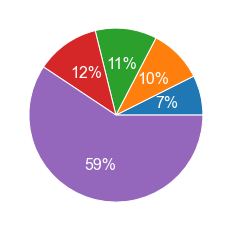

In [59]:
fig,_,pcts = plt.pie(QC_area,
        #labels = ['Passed','Discarded'],
        #colors=['tab:blue','tab:red'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')
    
plt.savefig('./raw_files/FigS1a_QC_num_pie.svg', format="svg")


###### 

# Fig S1B

In [44]:
DF_metadata = pd.read_csv("../../data/raw_data/Pseudomonas_putida_2020-08-31.tsv", sep='\t', index_col=0)
DF_metadata_passed=pd.read_csv("../../data/interim/metadata_qc.csv", index_col=0)

In [57]:
data = DF_metadata_passed['full_name'].value_counts().sort_values()

In [80]:
DF_metadata.index.size

541

In [66]:
data = [DF_metadata_passed.index.size, DF_metadata.index.size-DF_metadata_passed.index.size]

In [67]:
data

[321, 220]

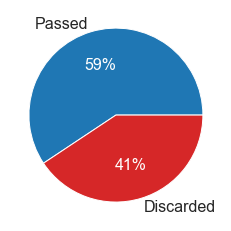

In [79]:
fig,_,pcts = plt.pie(data,
        labels = ['Passed','Discarded'],
        colors=['tab:blue','tab:red'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')
    
plt.savefig('./raw_files/FigS1b_QC_pie.svg', format="svg")


# Fig S1B

In [44]:
DF_metadata = pd.read_csv("../../data/raw_data/Pseudomonas_putida_2020-08-31.tsv", sep='\t', index_col=0)
DF_metadata_passed=pd.read_csv("../../data/interim/metadata_qc.csv", index_col=0)

In [57]:
data = DF_metadata_passed['full_name'].value_counts().sort_values()

In [80]:
DF_metadata.index.size

541

In [66]:
data = [DF_metadata_passed.index.size, DF_metadata.index.size-DF_metadata_passed.index.size]

In [67]:
data

[321, 220]

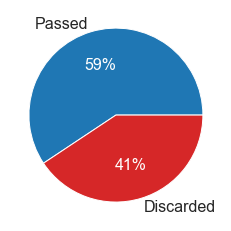

In [79]:
fig,_,pcts = plt.pie(data,
        labels = ['Passed','Discarded'],
        colors=['tab:blue','tab:red'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')
    
plt.savefig('./raw_files/FigS1b_QC_pie.svg', format="svg")


# Fig S1B

In [10]:
DF_metadata_passed=pd.read_csv("../../data/interim/metadata_qc.csv", index_col=0)

In [11]:
data = DF_metadata_passed['full_name'].value_counts().sort_values()

In [12]:
DF_metadata.index.size

541

In [13]:
data = [DF_metadata_passed.index.size, DF_metadata.index.size-DF_metadata_passed.index.size]

In [14]:
data

[321, 220]

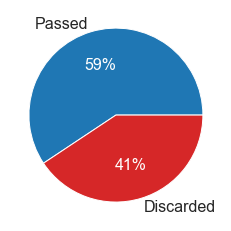

In [15]:
fig,_,pcts = plt.pie(data,
        labels = ['Passed','Discarded'],
        colors=['tab:blue','tab:red'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')
    
plt.savefig('./raw_files/FigS1b_QC_pie.svg', format="svg")


# Fig S1C

In [8]:
pca = PCA()
DF_weights = pd.DataFrame(pca.fit_transform(DF_log_tpm.T),index=DF_log_tpm.columns)
DF_components = pd.DataFrame(pca.components_.T,index=DF_log_tpm.index)

NameError: name 'DF_log_tpm' is not defined

NameError: name 'DF_metadata' is not defined

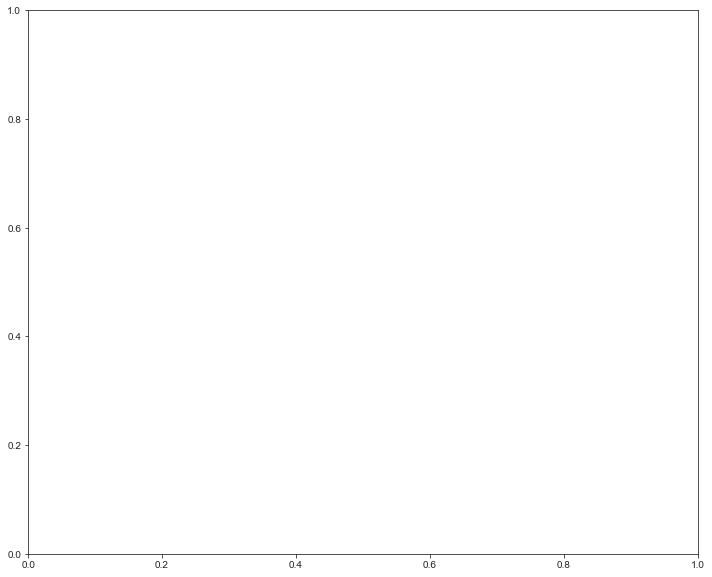

In [9]:
fig,ax = plt.subplots(figsize=(12,10))
for name,group in DF_metadata.groupby('project_name'):
    idx = DF_log_tpm.loc[:,group.index.tolist()].columns.tolist()
    ax.scatter(DF_weights.loc[idx,0],
               DF_weights.loc[idx,1],
               label=name,alpha=0.8)
ax.set_xlabel('Component 1: %.1f%%'%(pca.explained_variance_ratio_[0]*100),fontsize=16)
ax.set_ylabel('Component 2: %.1f%%'%(pca.explained_variance_ratio_[1]*100),fontsize=16)
ax.set_title('Principal Component Plot',fontsize=18)
plt.legend(bbox_to_anchor=(1,1),fontsize=15,ncol=2)

In [27]:
fig.savefig("./raw_files/FigS1c_PCA.svg")